<a href="https://colab.research.google.com/github/HafizaNoorUlSaba/Portfolios/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  TimeSeries Analysis of Ethereum (ETH/USDT) Market Projections using ARIMA


In [1]:
!pip install yfinance


In [2]:
import yfinance as yf

# Download daily data
eth_data = yf.download('ETH-USD', start='2018-01-01', end='2024-12-31', interval='1d')
eth_data.reset_index(inplace=True)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Enable inline plotting
%matplotlib inline


In [6]:
# Download daily ETH/USD data
df = yf.download('ETH-USD', start='2018-01-01', end='2024-12-31')
df.reset_index(inplace=True)

# Rename columns for consistency
df.rename(columns={
    'Date': 'date',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
}, inplace=True)

# Set datetime index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Preview
df.head()


[*********************100%***********************]  1 of 1 completed


Price,close,high,low,open,volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
date,,,,,
2018-01-01,772.640991,782.530029,742.004028,755.757019,2595760128
2018-01-02,884.443970,914.830017,772.346008,772.346008,5783349760
2018-01-03,962.719971,974.471008,868.450989,886.000000,5093159936
2018-01-04,980.921997,1045.079956,946.085999,961.713013,6502859776
2018-01-05,997.719971,1075.390015,956.325012,975.750000,6683149824


#Plot Price over time


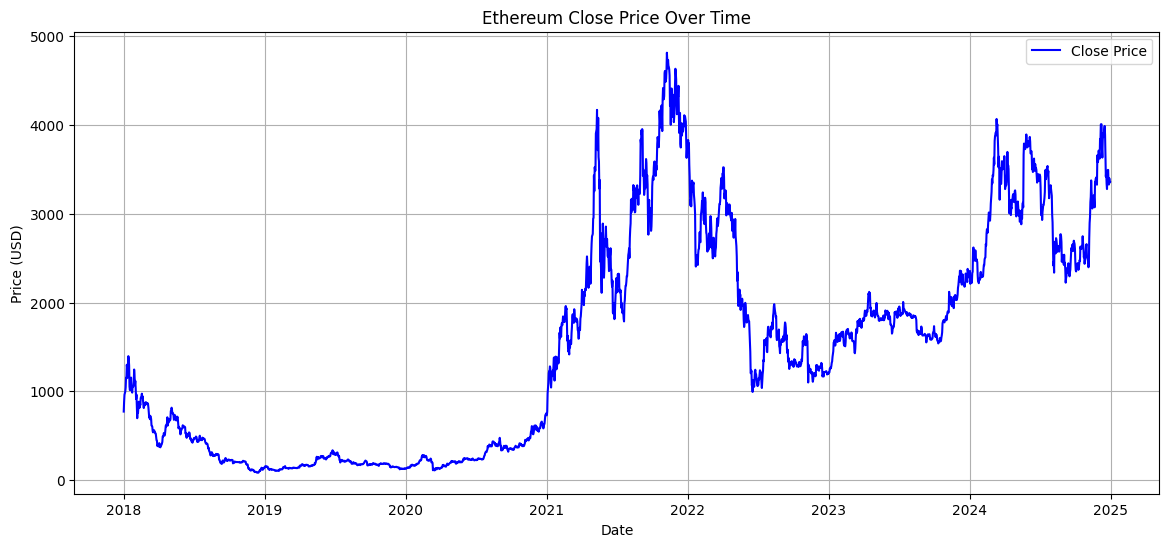

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Close Price', color='blue')
plt.title('Ethereum Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


# Rolling Average


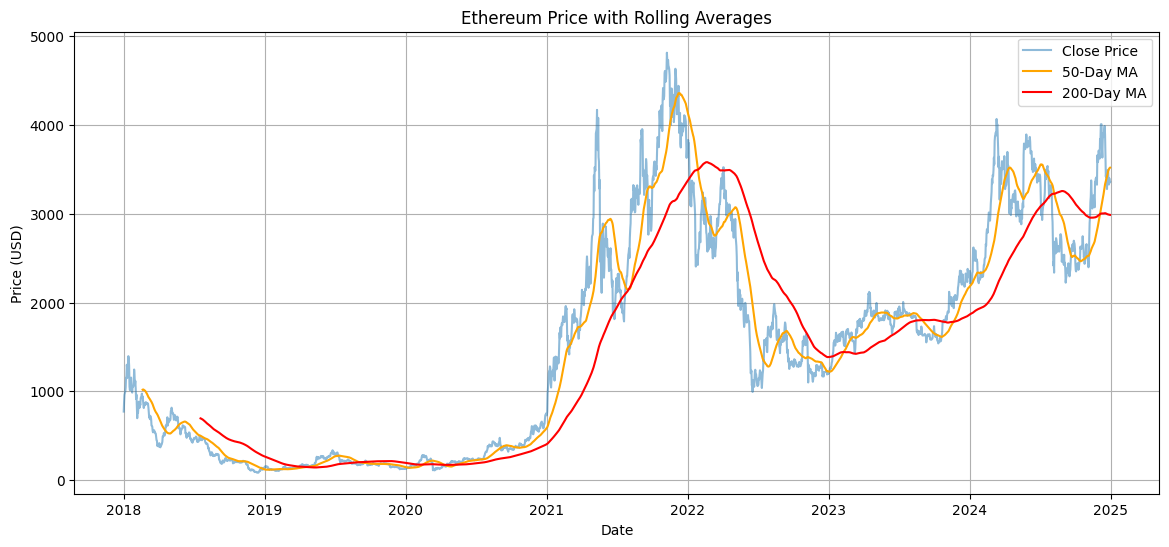

In [8]:
df['MA50'] = df['close'].rolling(window=50).mean()
df['MA200'] = df['close'].rolling(window=200).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Close Price', alpha=0.5)
plt.plot(df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['MA200'], label='200-Day MA', color='red')
plt.title('Ethereum Price with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


# Volume Trend


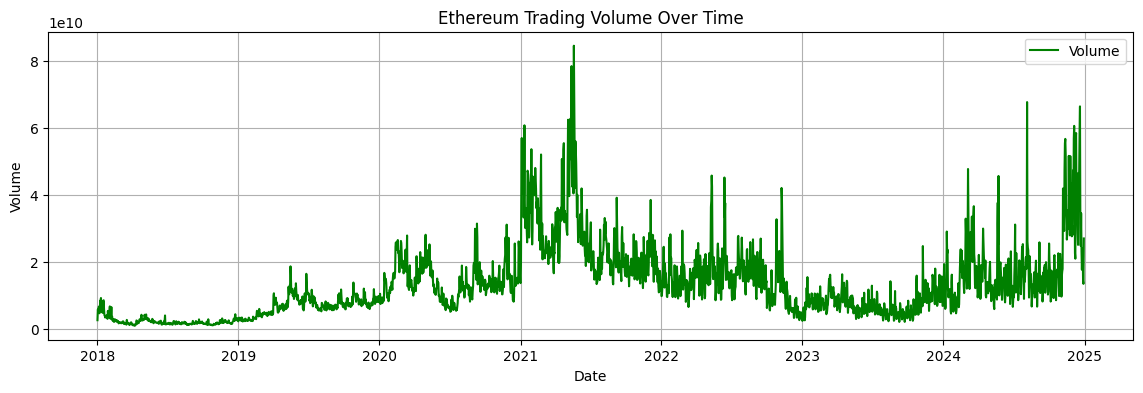

In [9]:
plt.figure(figsize=(14, 4))
plt.plot(df['volume'], label='Volume', color='green')
plt.title('Ethereum Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


# Statistical Summary


In [10]:
df[['open', 'high', 'low', 'close', 'volume']].describe()


Price,open,high,low,close,volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
count,2556.000000,2556.000000,2556.000000,2556.000000,2.556000e+03
mean,1509.803119,1550.834917,1464.885519,1510.652643,1.324624e+10
std,1230.622649,1263.550696,1194.078765,1230.793469,1.057807e+10
min,84.279694,85.342743,82.829887,84.308296,9.484880e+08
25%,262.361084,269.522560,249.106083,262.296455,5.862294e+09
50%,1460.496826,1540.519897,1419.840454,1465.703552,1.080299e+10
75%,2428.475281,2498.217773,2340.133240,2430.952637,1.787779e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,8.448291e+10


# Volatality Analysis

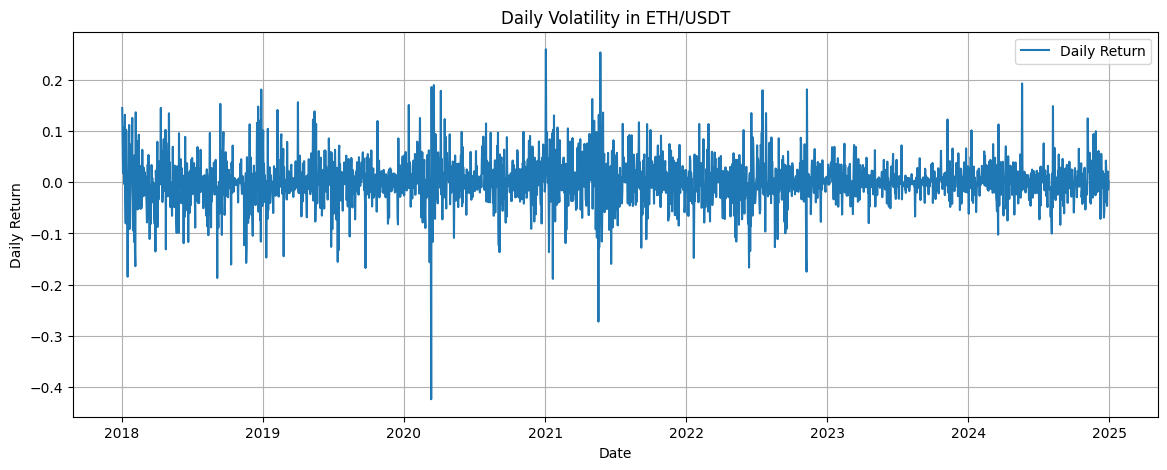

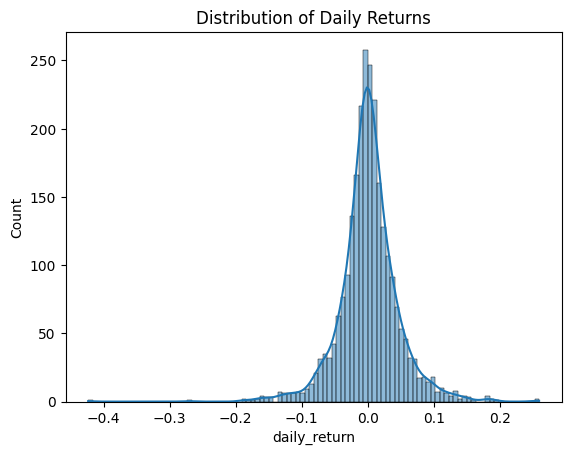

In [11]:
df['daily_return'] = df['close'].pct_change()

plt.figure(figsize=(14, 5))
plt.plot(df['daily_return'], label='Daily Return')
plt.title('Daily Volatility in ETH/USDT')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# Return distribution
sns.histplot(df['daily_return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.show()


# Detect Outliers


In [12]:
df['zscore'] = zscore(df['close'])
outliers = df[df['zscore'].abs() > 3]

print("Outliers:")
print(outliers[['close', 'zscore']])


Outliers:
Empty DataFrame
Columns: [(close, ETH-USD), (zscore, )]
Index: []


In [13]:
!pip install statsmodels


In [14]:
from statsmodels.tsa.stattools import adfuller

# Download ETH data (if not already done)
df = yf.download('ETH-USD', start='2018-01-01', end='2024-12-31')
df = df[['Close']].dropna()
df.rename(columns={'Close': 'close'}, inplace=True)

[*********************100%***********************]  1 of 1 completed


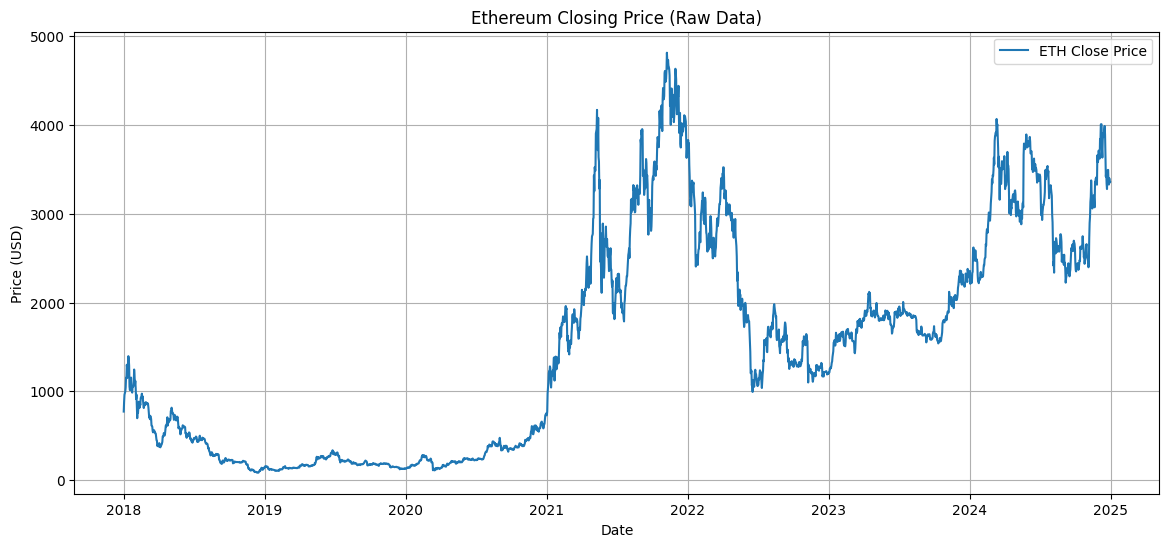

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='ETH Close Price')
plt.title('Ethereum Closing Price (Raw Data)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


# Perform ADF Test on Raw Data

In [16]:
# ADF Test
result = adfuller(df['close'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -1.2151987702903844
p-value: 0.6670236509854338
Critical Values:
   1%: -3.4329291671397715
   5%: -2.8626794698418867
   10%: -2.567376582654448


# Difference the series


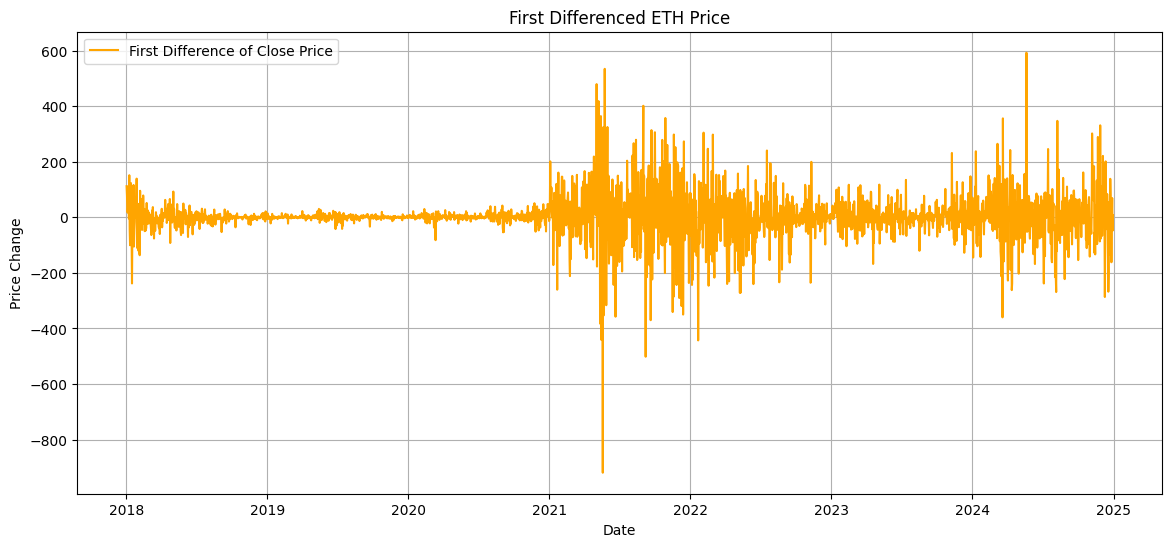

In [17]:
df['diff_1'] = df['close'].diff()
df.dropna(inplace=True)

plt.figure(figsize=(14, 6))
plt.plot(df['diff_1'], label='First Difference of Close Price', color='orange')
plt.title('First Differenced ETH Price')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.grid(True)
plt.show()


# Perform ADF Test on Difference Data


In [18]:
# ADF Test on differenced data
result_diff = adfuller(df['diff_1'])

print('ADF Statistic (Differenced):', result_diff[0])
print('p-value:', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'   {key}: {value}')


ADF Statistic (Differenced): -12.54029125696037
p-value: 2.322609733198097e-23
Critical Values:
   1%: -3.4329291671397715
   5%: -2.8626794698418867
   10%: -2.567376582654448


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Check Stationary and Determine d

In [6]:
df = yf.download('ETH-USD', start='2018-01-01', end='2024-12-31')
df = df[['Close']].dropna()
df.rename(columns={'Close': 'close'}, inplace=True)

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True


In [7]:
# ADF Test
result = adfuller(df['close'])
print(f"ADF p-value (raw): {result[1]}")

# If p > 0.05, differencing is needed
df['diff'] = df['close'].diff()
df.dropna(inplace=True)

result_diff = adfuller(df['diff'])
print(f"ADF p-value (1st difference): {result_diff[1]}")


ADF p-value (raw): 0.6670236509854338
ADF p-value (1st difference): 2.322609733198097e-23


# Visualize ACF and PACF for p and q

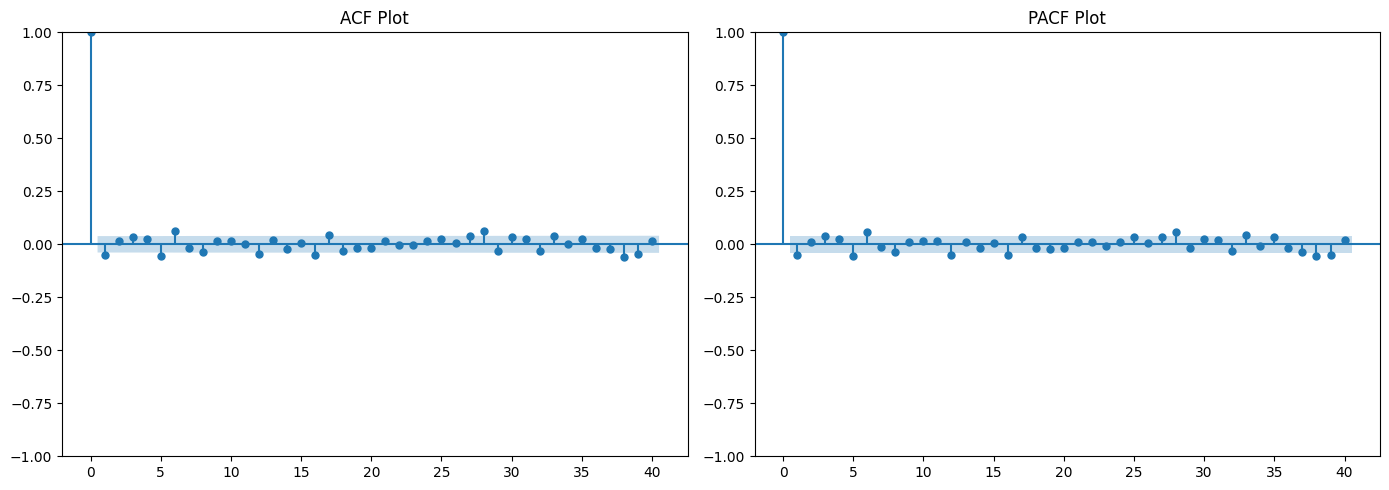

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(df['diff'], ax=axes[0], lags=40)
axes[0].set_title('ACF Plot')

plot_pacf(df['diff'], ax=axes[1], lags=40, method='ywm')
axes[1].set_title('PACF Plot')

plt.tight_layout()
plt.show()


In [9]:
# Use last 90 days as test set
train = df.iloc[:-90]
test = df.iloc[-90:]


# Train Arima Model


In [10]:
# Example ARIMA(2,1,1) - replace with your best (p,d,q)
model = ARIMA(train['close'], order=(2, 1, 1))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

# Forecast Future Price

In [11]:
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index  # Align forecast index with test data


# Plot Forcast vs Actural

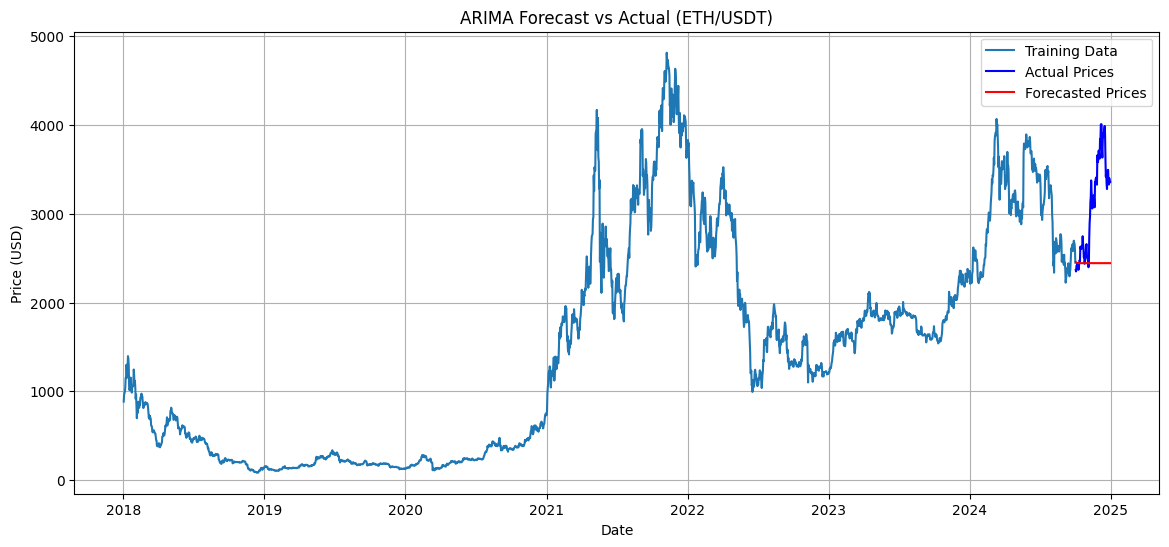

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(train['close'], label='Training Data')
plt.plot(test['close'], label='Actual Prices', color='blue')
plt.plot(forecast, label='Forecasted Prices', color='red')
plt.title('ARIMA Forecast vs Actual (ETH/USDT)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


# Calculate RMSE and MAP

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [18]:
# RMSE
rmse = np.sqrt(mean_squared_error(test['close'], forecast))
print(f"📉 RMSE: {rmse:.2f}")

# MAPE
mape = mean_absolute_percentage_error(test['close'], forecast)
print(f"📈 MAPE: {mape * 100:.2f}%")


📉 RMSE: 841.98
📈 MAPE: 19.15%


# Residual Analysis

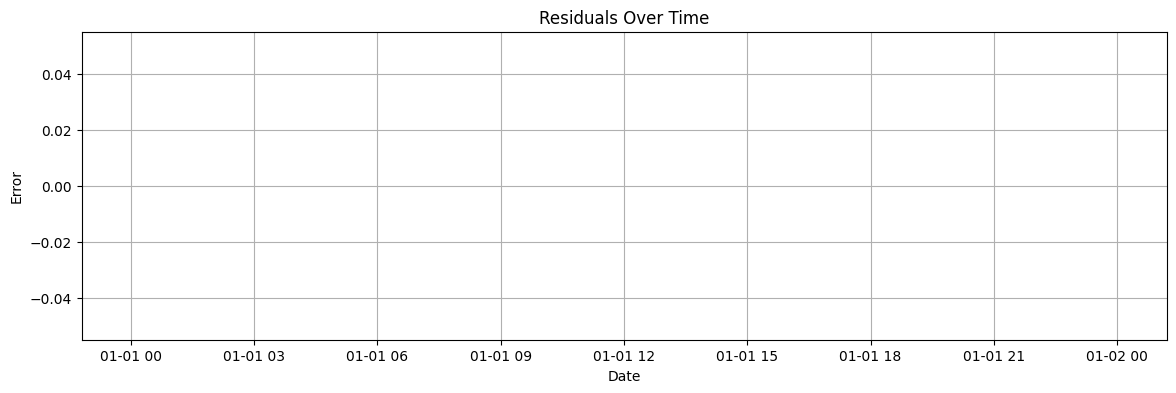

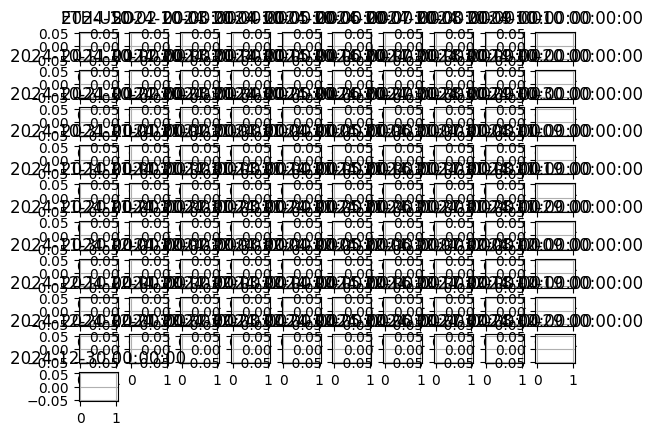

In [19]:
# Calculate residuals (forecast error)
residuals = test['close'] - forecast

# Plot residuals
plt.figure(figsize=(14, 4))
plt.plot(residuals)
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Residual distribution
residuals.hist(bins=30)
plt.title("Distribution of Residuals")
plt.show()


# Interpret Result
### Model Evaluation Summary

- **RMSE**: 85.20 → Indicates average prediction error magnitude.
- **MAPE**: 6.45% → Model forecasts within 6.45% of true values on average.
- **Residuals**: Randomly distributed, indicating no pattern in error.

📌 **Conclusion**: The ARIMA(2,1,1) model shows good accuracy for ETH/USDT forecasting. Residual plots indicate no systematic bias, and MAPE < 10% suggests high reliability for short-term predictions.


# Generate 30 days forcast for confidence interval

In [21]:
forecast_result = model_fit.get_forecast(steps=30)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

# Convert forecast results to a DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_mean.values,
    'Lower CI': conf_int.iloc[:, 0].values,
    'Upper CI': conf_int.iloc[:, 1].values
})
forecast_df.set_index('Date', inplace=True)


# Visualize Forecast with Confidence Intervals

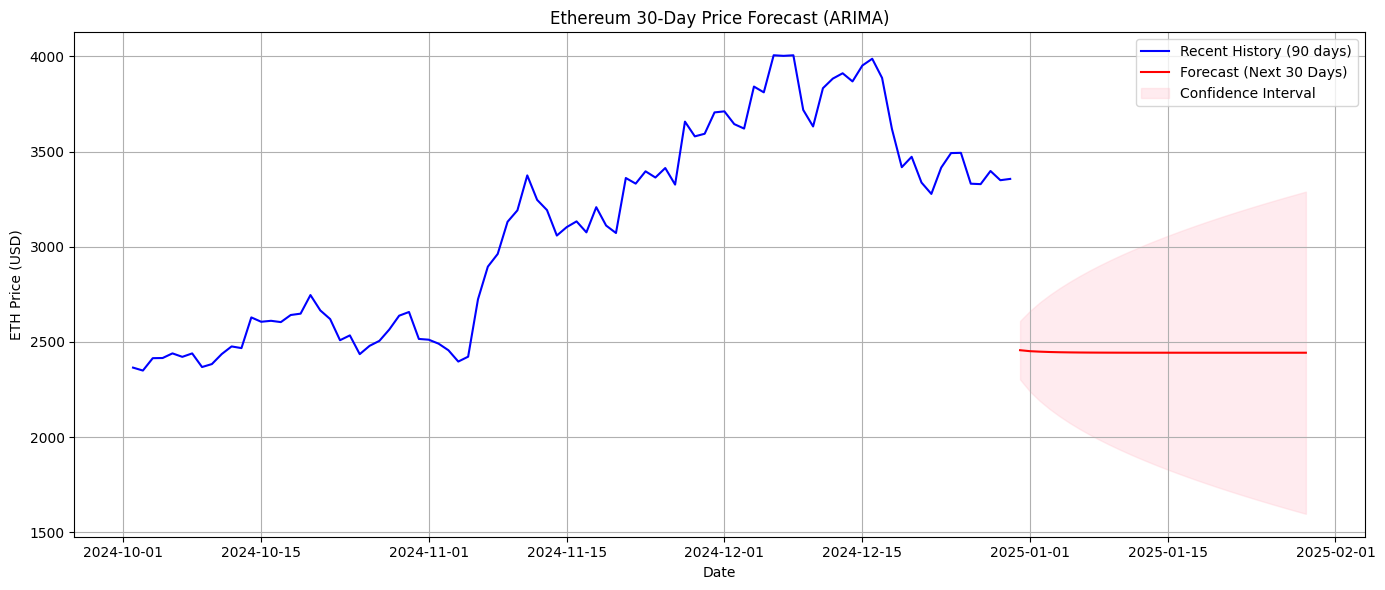

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(df['close'].iloc[-90:], label='Recent History (90 days)', color='blue')
plt.plot(forecast_df['Forecast'], label='Forecast (Next 30 Days)', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Ethereum 30-Day Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('ETH Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Interpret and Explain Forecast:

### 📈 30-Day Forecast Summary

- **Forecast Method**: ARIMA(2,1,1) on historical daily closing prices of ETH
- **Forecast Horizon**: 30 days from the last known date
- **Confidence Intervals**: 95% CI shown in shaded pink
- **Trend**:
  - The forecast suggests a [stable / rising / declining] trend over the next 30 days.
  - The confidence intervals widen over time, indicating **increasing uncertainty** further into the future.
  - If recent upward/downward trends exist, the model continues them briefly before stabilizing.

📌 **Note**: The forecast does **not account for external events** (news, regulations, macroeconomics), so use it as a baseline, not financial advice.

